In [ ]:
# ENVIRONMENT SETUP
# Run before the first restart
!pip uninstall -y numpy scipy gensim transformers scikit-learn torch torchvision torchaudio

!pip install numpy==1.26.4 --quiet
!pip install scipy==1.10.1 --quiet
!pip install gensim==4.3.1 --quiet
!pip install transformers==4.38.0 --quiet
!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu121 --quiet
!pip install scikit-learn==1.4.2 --quiet

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.16.1
Uninstalling scipy-1.16.1:
  Successfully uninstalled scipy-1.16.1
Found existing installation: transformers 4.55.0
Uninstalling transformers-4.55.0:
  Successfully uninstalled transformers-4.55.0
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Data Staging
import os
from google.colab import drive

# 1. Mounts Google Drive
drive.mount('/content/drive')
print("Drive mounted.")

# 2. Downloads and extracts Tuckute et al. Data
repo_name = 'drive_suppress_brains'
if not os.path.exists(repo_name):
    !git clone https://github.com/gretatuckute/drive_suppress_brains.git

# Define the data directory path
data_dir = os.path.join('/content', repo_name)

# Checks if the main data file is missing, if so, download and extract
if not os.path.exists(os.path.join(data_dir, 'data', 'brain-lang-data_participant_20230728.csv')):
    !wget https://evlabwebapps.mit.edu/public_data/tuckute2024_driving_suppressing/data.tar -P {data_dir}
    !tar -xf {os.path.join(data_dir, 'data.tar')} -C {data_dir}
    !rm {os.path.join(data_dir, 'data.tar')}
    print("Main data extracted.")

# Checks if the model activations file is missing, if so, download and extract
if not os.path.exists(os.path.join(data_dir, 'model-actv', 'gpt2-xl')):
    !wget https://evlabwebapps.mit.edu/public_data/tuckute2024_driving_suppressing/model-actv.tar -P {data_dir}
    !tar -xf {os.path.join(data_dir, 'model-actv.tar')} -C {data_dir}
    !rm {os.path.join(data_dir, 'model-actv.tar')}
    print("Model activations extracted")

# 3. Downloads Pereira et al. / HW3 Data
if not os.path.exists('learn_decoder.py'):
    !pip install gdown --quiet
    import gdown
    file_id = '1xZaorRH-xxjfochvSesAhOTUg82_Xq56'
    output_zip = 'hw3_files.zip'
    gdown.download(id=file_id, output=output_zip, quiet=False)
    !unzip -o hw3_files.zip
    !rm hw3_files.zip
    print("Pereira et al. data ready.")

!ls -l /content/drive_suppress_brains/
print("\nAll data staging should now be complete.")

Mounted at /content/drive
Drive mounted.
Cloning into 'drive_suppress_brains'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 131 (delta 66), reused 76 (delta 27), pack-reused 0 (from 0)
Receiving objects: 100% (131/131), 18.43 MiB | 22.15 MiB/s, done.
Resolving deltas: 100% (66/66), done.
--2025-08-15 11:11:00--  https://evlabwebapps.mit.edu/public_data/tuckute2024_driving_suppressing/data.tar
Resolving evlabwebapps.mit.edu (evlabwebapps.mit.edu)... 18.13.53.70
Connecting to evlabwebapps.mit.edu (evlabwebapps.mit.edu)|18.13.53.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7794928 (7.4M) [application/x-tar]
Saving to: ‘/content/drive_suppress_brains/data.tar’

data.tar            100%[===================>]   7.43M  24.1MB/s    in 0.3s    

2025-08-15 11:11:01 (24.1 MB/s) - ‘/content/drive_suppress_brains/data.tar’ saved [7794928/7794928]

Main data ex

Downloading...
From (original): https://drive.google.com/uc?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56
From (redirected): https://drive.google.com/uc?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&confirm=t&uuid=683351ce-43b8-4338-83ff-919a26ec0616
To: /content/hw3_files.zip
100%|██████████| 97.7M/97.7M [00:01<00:00, 58.2MB/s]


Archive:  hw3_files.zip
  inflating: stimuli_180concepts.txt  
  inflating: learn_decoder.py        
  inflating: vectors_180concepts.GV42B300.txt  
  inflating: imaging_data.csv        
Pereira et al. data ready.
total 32
drwxrwsr-x 2 170572 102009 4096 Dec 22  2023 data
drwxr-xr-x 2 root   root   4096 Aug 15 11:11 env
-rw-r--r-- 1 root   root   1070 Aug 15 11:11 LICENSE
drwxrwsr-x 3 170572 102009 4096 Dec 22  2023 model-actv
-rw-r--r-- 1 root   root   7833 Aug 15 11:11 README.md
drwxr-xr-x 2 root   root   4096 Aug 15 11:11 setup_utils
drwxr-xr-x 5 root   root   4096 Aug 15 11:11 src

All data staging should now be complete.


In [ ]:
# Cell 3: Data Loading & High-Dimensional Preparation
import pandas as pd
import numpy as np
import os
from learn_decoder import read_matrix

# 1. Defines Paths
base_path_tuckute = '/content/drive_suppress_brains'

# Full paths to the Tuckute et al. files
main_data_path = os.path.join(base_path_tuckute, 'data/brain-lang-data_participant_20230728.csv')
actv_path = os.path.join(base_path_tuckute, 'model-actv/gpt2-xl/last-tok/beta-control-neural-D_actv.pkl')
stim_path = os.path.join(base_path_tuckute, 'model-actv/gpt2-xl/last-tok/beta-control-neural-D_stim.pkl')

# 2. Load All Raw DataFrames
# Tuckute et al. data
df_main = pd.read_csv(main_data_path)
df_activations = pd.read_pickle(actv_path)
df_stim_meta = pd.read_pickle(stim_path)
# Pereira / HW3 data (located in /content/)
data_concepts = read_matrix("/content/imaging_data.csv", sep=",")
sentences_pereira = [line.strip() for line in open('/content/stimuli_180concepts.txt', 'r')]

# Step A: Identify the sentences that have model activations.
item_ids_with_activations = df_stim_meta['item_id'].unique()

# Step B: Filter the main fMRI dataframe to ONLY these sentences.
df_main_filtered = df_main[df_main['item_id'].isin(item_ids_with_activations)]

# Step C: Pivot the filtered data to create the (sentence x ROI) matrix.
df_pivot = df_main_filtered.pivot_table(index='item_id', columns='roi', values='response_target').dropna()
print(f"Pivoted fMRI data into a matrix with shape: {df_pivot.shape}")

# Step D: Align metadata and activations to the final fMRI dataframe index.
df_meta_aligned = df_stim_meta.set_index('item_id').loc[df_pivot.index]
original_string_indices = df_meta_aligned.index.map(pd.Series(df_stim_meta.index, index=df_stim_meta['item_id']))
df_activations_aligned = df_activations.loc[original_string_indices]

# High-dimensional fMRI data (sentences x 6 ROIs)
fmri_data_matrix = df_pivot.to_numpy()

# Corresponding metadata
conditions = df_meta_aligned['cond'].values
sentences = df_meta_aligned['sentence'].values
readable_conditions_map = {'D': 'Driving', 'S': 'Suppressing', 'B': 'Baseline'}
readable_conditions = np.array([readable_conditions_map.get(c, c) for c in conditions])

# Pre-computed GPT-2 XL layer-wise embeddings (for project expansion)
layer_embeddings = {}
column_level_0 = df_activations_aligned.columns.get_level_values(0)
num_layers = column_level_0.nunique()
for layer_idx in range(num_layers):
    layer_mask = column_level_0 == layer_idx
    layer_embeddings[layer_idx] = df_activations_aligned.loc[:, layer_mask].to_numpy()

# 3. Final sanity check
print("\nFinal Prepared Data Shapes")
print(f"Pereira fMRI Data (data_concepts):             {data_concepts.shape}")
print(f"Tuckute High-Dim fMRI (fmri_data_matrix):      {fmri_data_matrix.shape}")
print(f"Tuckute Conditions (conditions):               {conditions.shape}")

if len(set([fmri_data_matrix.shape[0], conditions.shape[0], sentences.shape[0], layer_embeddings[0].shape[0]])) == 1:
    print(f"\nRow counts match at {fmri_data_matrix.shape[0]} sentences. All data is loaded, prepared, and ready for analysis!")
else:
    print("\nWarning: Row counts do not match. There is an alignment issue.")

Pivoted fMRI data into a matrix with shape: (1500, 6)

Final Prepared Data Shapes
Pereira fMRI Data (data_concepts):             (180, 170712)
Tuckute High-Dim fMRI (fmri_data_matrix):      (1500, 6)
Tuckute Conditions (conditions):               (1500,)

Row counts match at 1500 sentences. All data is loaded, prepared, and ready for analysis!


Distribution of experimental conditions
B    1000
D     250
S     250
Name: count, dtype: int64


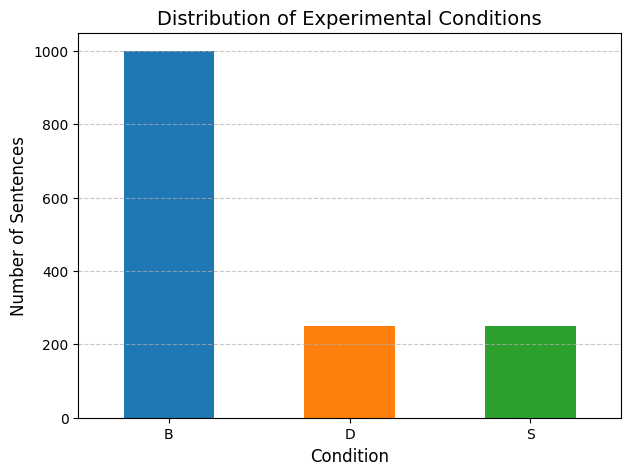


Distribution of Averaged fMRI Response by Condition


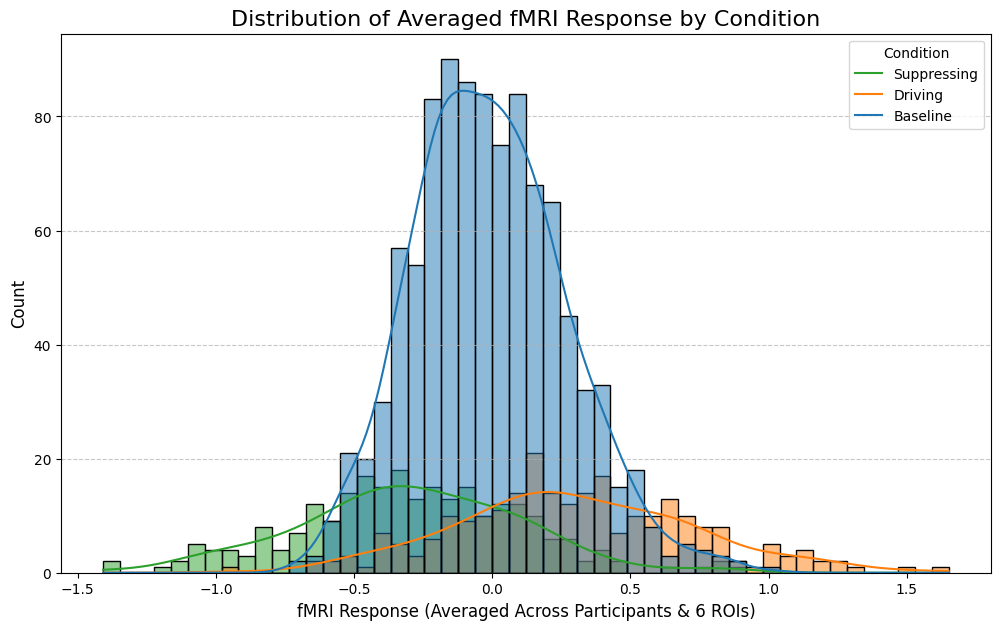


Summary statistics for the averaged fMRI response:
              count      mean       std       min       25%       50%  \
condition                                                               
Baseline     1000.0 -0.011980  0.274563 -0.698465 -0.203537 -0.026629   
Driving       250.0  0.300095  0.432787 -0.941988  0.022192  0.274891   
Suppressing   250.0 -0.297577  0.402328 -1.408265 -0.536191 -0.303046   

                  75%       max  
condition                        
Baseline     0.162606  1.003715  
Driving      0.596892  1.651437  
Suppressing -0.039013  0.887457  


Comparing Sentence Lengths


/tmp/ipython-input-2216787104.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sentences, x='condition', y='length',


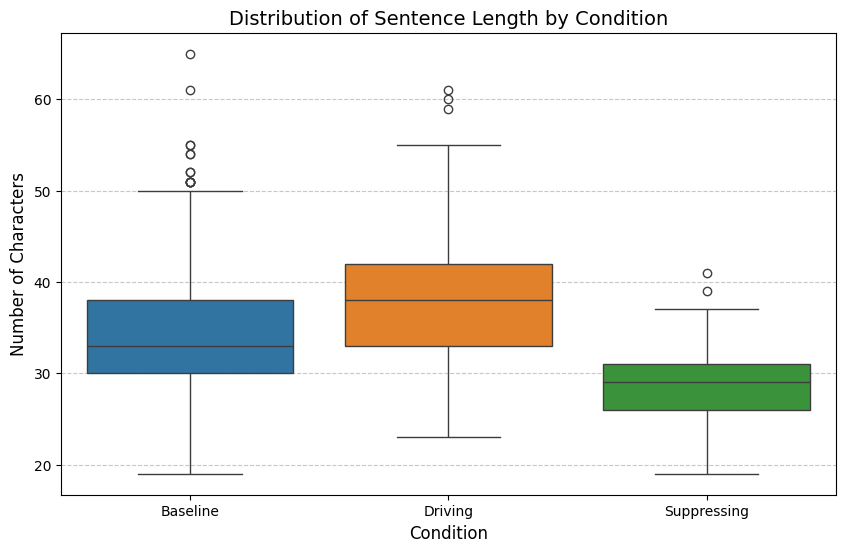


Summary statistics for sentence length:
              count    mean       std   min   25%   50%   75%   max
condition                                                          
Baseline     1000.0  34.064  6.047187  19.0  30.0  33.0  38.0  65.0
Driving       250.0  38.100  6.827919  23.0  33.0  38.0  42.0  61.0
Suppressing   250.0  28.976  3.515803  19.0  26.0  29.0  31.0  41.0


In [ ]:
# Cell 4: Data Exploration
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Explores condition balance
print("Distribution of experimental conditions")
condition_counts = pd.Series(conditions).value_counts()
print(condition_counts)
plt.figure(figsize=(7, 5))
condition_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c']) # Standard colors for B, D, S
plt.title('Distribution of Experimental Conditions', fontsize=14)
plt.ylabel('Number of Sentences', fontsize=12)
plt.xlabel('Condition', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Explores fMRI responses
print("\nDistribution of Averaged fMRI Response by Condition")
# Average across the 6 ROIs for this visualization
fmri_response_avg = np.mean(fmri_data_matrix, axis=1)
df_analysis = pd.DataFrame({'fmri_response': fmri_response_avg, 'condition': readable_conditions})

plt.figure(figsize=(12, 7))
sns.histplot(data=df_analysis, x='fmri_response', hue='condition', kde=True, bins=50,
             palette={'Driving':'#ff7f0e', 'Suppressing':'#2ca02c', 'Baseline':'#1f77b4'})
plt.title('Distribution of Averaged fMRI Response by Condition', fontsize=16)
plt.xlabel('fMRI Response (Averaged Across Participants & 6 ROIs)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Condition', labels=['Suppressing', 'Driving', 'Baseline'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nSummary statistics for the averaged fMRI response:")
print(df_analysis.groupby('condition')['fmri_response'].describe())

# 3. Explore Sentence Lengths (as a potential confound)
print("\n\nComparing Sentence Lengths")
df_sentences = pd.DataFrame({'sentence': sentences, 'condition': readable_conditions})
df_sentences['length'] = df_sentences['sentence'].str.len()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sentences, x='condition', y='length',
            palette={'Driving':'#ff7f0e', 'Suppressing':'#2ca02c', 'Baseline':'#1f77b4'})
plt.title('Distribution of Sentence Length by Condition', fontsize=14)
plt.ylabel('Number of Characters', fontsize=12)
plt.xlabel('Condition', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nSummary statistics for sentence length:")
print(df_sentences.groupby('condition')['length'].describe())

In [ ]:
# Creates final datasets & generates BERT embeddings
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# 1. Splits data into training & testing sets based on conditions
# Training set (all sentences from the 'Baseline' condition)
baseline_mask = (conditions == 'B')
fmri_train_baseline = fmri_data_matrix[baseline_mask]
sentences_train_baseline = sentences[baseline_mask]

# Testing set (all sentences from 'Driving' and 'Suppressing' conditions)
experimental_mask = (conditions == 'D') | (conditions == 'S')
fmri_test_exp = fmri_data_matrix[experimental_mask]
sentences_test_exp = sentences[experimental_mask]
conditions_test_exp = conditions[experimental_mask] # This will contain just 'D' and 'S' labels

print(f"Training set shapes: fMRI={fmri_train_baseline.shape}, Sentences={len(sentences_train_baseline)}")
print(f"Testing set shapes:  fMRI={fmri_test_exp.shape}, Sentences={len(sentences_test_exp)}")

# 2. Generates BERT embeddings for both sets
print("\nLoading pre-trained BERT model and tokenizer...")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()

def get_bert_embedding(sentence):
    with torch.no_grad():
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128)
        outputs = model(**inputs)
        # We use the embedding of the special [CLS] token for sentence representation
        return outputs.last_hidden_state[:, 0, :].squeeze().numpy()

print("\nGenerating BERT embeddings for TRAINING (Baseline) sentences")
vectors_train_baseline = np.array([get_bert_embedding(s) for s in sentences_train_baseline])

print("\nGenerating BERT embeddings for TESTING (D/S) sentences")
vectors_test_exp = np.array([get_bert_embedding(s) for s in sentences_test_exp])

print("\nFinal Variable Shapes for Experiment")
print(f"fmri_train_baseline:      {fmri_train_baseline.shape}")
print(f"vectors_train_baseline:   {vectors_train_baseline.shape}")
print(f"fmri_test_exp:            {fmri_test_exp.shape}")
print(f"vectors_test_exp:         {vectors_test_exp.shape}")
print(f"conditions_test_exp:      {conditions_test_exp.shape}")

Training set shapes: fMRI=(1000, 6), Sentences=1000
Testing set shapes:  fMRI=(500, 6), Sentences=500

Loading pre-trained BERT model and tokenizer...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


Generating BERT embeddings for TRAINING (Baseline) sentences

Generating BERT embeddings for TESTING (D/S) sentences

Final Variable Shapes for Experiment
fmri_train_baseline:      (1000, 6)
vectors_train_baseline:   (1000, 768)
fmri_test_exp:            (500, 6)
vectors_test_exp:         (500, 768)
conditions_test_exp:      (500,)


In [ ]:
# The core decoding experiment
import numpy as np
from learn_decoder import learn_decoder # From HW3 files

# Helper function for rank accuracy
# This function calculates the rank for a set of predicted vectors against their true counterparts.
def calculate_rank_accuracy(predicted_vectors, true_vectors):
    ranks = []
    num_candidates = len(true_vectors)
    for i in range(num_candidates):
        # Get the i-th predicted vector
        pred_vec = predicted_vectors[i]

        # Calculates cosine similarity of this predicted vector against ALL true vectors in the set
        sims = np.dot(true_vectors, pred_vec) / (np.linalg.norm(true_vectors, axis=1) * np.linalg.norm(pred_vec))
        sims = np.nan_to_num(sims) # Handles potential division by zero

        # Finds the rank of the correct vector (which is at index `i` in the original order)
        sorted_indices = np.argsort(sims)[::-1]
        rank = np.where(sorted_indices == i)[0][0] + 1
        ranks.append(rank)
    return ranks

# 1. Trains the decoder on the BASELINE Data
# The inputs are the baseline fMRI matrix and the corresponding BERT vectors
decoder_M = learn_decoder(fmri_train_baseline, vectors_train_baseline)
print(f"Decoder trained. Shape of mapping matrix M: {decoder_M.shape}")

# 2. Predicts vectors for the entire experimental test set
predicted_vectors_exp = fmri_test_exp @ decoder_M

# 3. Splits the results and evaluates each condition
driving_mask_exp = (conditions_test_exp == 'D')
suppressing_mask_exp = (conditions_test_exp == 'S')

# Evaluates Driving condition
predicted_vectors_driving = predicted_vectors_exp[driving_mask_exp]
true_vectors_driving = vectors_test_exp[driving_mask_exp]
ranks_driving = calculate_rank_accuracy(predicted_vectors_driving, true_vectors_driving)
avg_rank_driving = np.mean(ranks_driving)
print(f"Average Rank for Driving: {avg_rank_driving:.2f}")

# Evaluates Suppressing condition
predicted_vectors_suppressing = predicted_vectors_exp[suppressing_mask_exp]
true_vectors_suppressing = vectors_test_exp[suppressing_mask_exp]
ranks_suppressing = calculate_rank_accuracy(predicted_vectors_suppressing, true_vectors_suppressing)
avg_rank_suppressing = np.mean(ranks_suppressing)
print(f"Average Rank for Suppressing: {avg_rank_suppressing:.2f}")


Decoder trained. Shape of mapping matrix M: (6, 768)
Average Rank for Driving: 123.71
Average Rank for Suppressing: 119.58


--- Statistical Analysis (Independent Samples T-test) ---
Comparing ranks for Driving (mean=123.71) vs. Suppressing (mean=119.58)
T-statistic: 0.64
P-value: 0.5231

Conclusion: The difference in average ranks is NOT statistically significant.


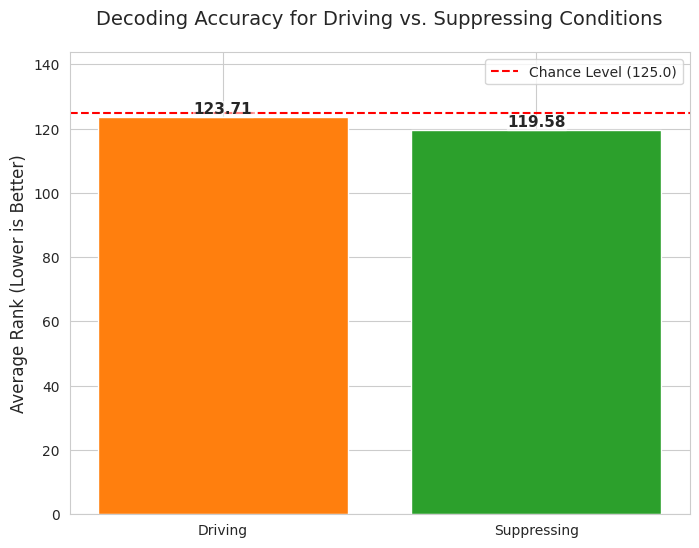

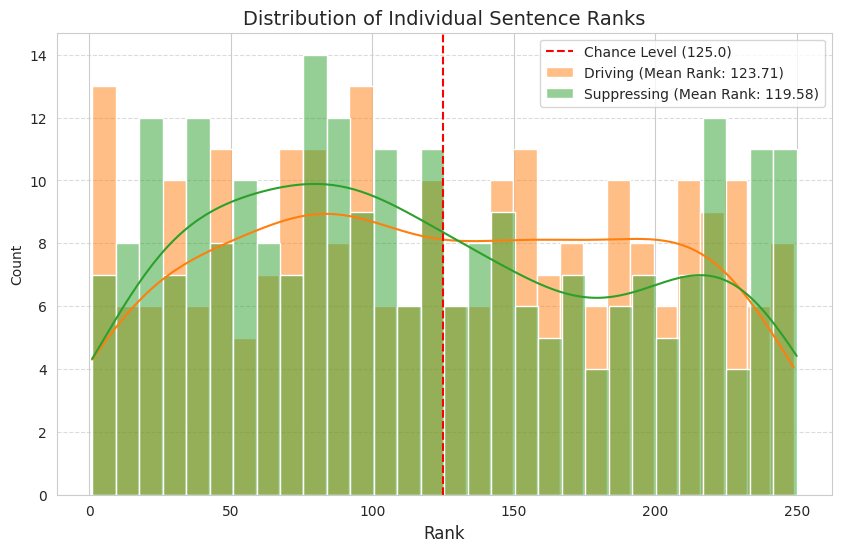

In [ ]:
# Analyze and Plot Final Results
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Statistical Test
# We use Welch's t-test (equal_var=False), which is robust and doesn't assume the two groups have the same variance
ttest_result = stats.ttest_ind(ranks_driving, ranks_suppressing, equal_var=False)
print("Statistical Analysis (Independent Samples T-test)")
print(f"Comparing ranks for Driving (mean={np.mean(ranks_driving):.2f}) vs. Suppressing (mean={np.mean(ranks_suppressing):.2f})")
print(f"T-statistic: {ttest_result.statistic:.2f}")
print(f"P-value: {ttest_result.pvalue:.4f}")

if ttest_result.pvalue < 0.05:
    print("\nConclusion: The difference in average ranks IS statistically significant.")
else:
    print("\nConclusion: The difference in average ranks is NOT statistically significant.")

# 2. Final Bar Plot
conditions_plot = ['Driving', 'Suppressing']
avg_ranks_plot = [avg_rank_driving, avg_rank_suppressing]
# Each condition has 250 sentences
chance_level_plot = 250 / 2

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
bars = plt.bar(conditions_plot, avg_ranks_plot, color=['#ff7f0e', '#2ca02c']) # Distinct colors
plt.axhline(y=chance_level_plot, color='red', linestyle='--', label=f'Chance Level ({chance_level_plot})')

plt.ylabel('Average Rank (Lower is Better)', fontsize=12)
plt.title('Decoding Accuracy for Driving vs. Suppressing Conditions', fontsize=14, pad=20)
plt.legend()

# Adds the rank values on top of the bars for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center',
             fontsize=11, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5, pad=0.2))

plt.ylim(0, chance_level_plot * 1.15)
plt.show()

# Histogram of Ranks
plt.figure(figsize=(10, 6))
sns.histplot(ranks_driving, color='#ff7f0e', label=f'Driving (Mean Rank: {avg_rank_driving:.2f})', kde=True, bins=30)
sns.histplot(ranks_suppressing, color='#2ca02c', label=f'Suppressing (Mean Rank: {avg_rank_suppressing:.2f})', kde=True, bins=30)
plt.axvline(chance_level_plot, color='red', linestyle='--', label=f'Chance Level ({chance_level_plot})')
plt.title('Distribution of Individual Sentence Ranks', fontsize=14)
plt.xlabel('Rank', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Expansion A - Layer-wise Decoding Analysis
import time

# 1. Generates Layer-wise BERT Embeddings
# We need to re-run the embedding generation, but this time save all layers.
model_with_layers = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)
model_with_layers.eval()

def get_bert_layer_embeddings(sentence, layers_to_get):
    with torch.no_grad():
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128)
        outputs = model_with_layers(**inputs)
        hidden_states = outputs.hidden_states # This is a tuple of 13 tensors (input + 12 layers)

        # Gets the [CLS] token's embedding from each specified layer
        layer_vectors = {}
        for layer_idx in layers_to_get:
            # +1 because hidden_states[0] is the input embedding
            layer_vectors[layer_idx] = hidden_states[layer_idx + 1][:, 0, :].squeeze().numpy()
        return layer_vectors

# Define which layers to test
# Let's test an early, a middle, and the final layer
layers_to_test = [3, 7, 11] # Corresponds to Layer 4, 8, and 12

print(f"Will be generating embeddings for layers: {[l+1 for l in layers_to_test]}")

# Generates and stores embeddings for all sentences and layers
start_time = time.time()

# For TRAINING (Baseline) sentences
vectors_train_layers = {layer: [] for layer in layers_to_test}
for sentence in sentences_train_baseline:
    layer_vectors = get_bert_layer_embeddings(sentence, layers_to_test)
    for layer_idx in layers_to_test:
        vectors_train_layers[layer_idx].append(layer_vectors[layer_idx])

# For TESTING (D/S) sentences
vectors_test_layers = {layer: [] for layer in layers_to_test}
for sentence in sentences_test_exp:
    layer_vectors = get_bert_layer_embeddings(sentence, layers_to_test)
    for layer_idx in layers_to_test:
        vectors_test_layers[layer_idx].append(layer_vectors[layer_idx])

# Converts lists to NumPy arrays
for layer_idx in layers_to_test:
    vectors_train_layers[layer_idx] = np.array(vectors_train_layers[layer_idx])
    vectors_test_layers[layer_idx] = np.array(vectors_test_layers[layer_idx])

end_time = time.time()
print(f"Embedding generation took {end_time - start_time:.2f} seconds.")

# 2. Runs the Decoding experiment for each layer
print("\nRunning Decoding Experiment Across Layers")

# Stores results here
results = []

for layer_idx in layers_to_test:
    print(f"\n-TESTING LAYER {layer_idx + 1}")

    # Trains a specific decoder for this layer's vectors
    decoder_M_layer = learn_decoder(fmri_train_baseline, vectors_train_layers[layer_idx])

    # Predicts vectors for the test set
    predicted_vectors_exp_layer = fmri_test_exp @ decoder_M_layer

    # Evaluates Driving condition for this layer
    predicted_driving_layer = predicted_vectors_exp_layer[driving_mask_exp]
    true_driving_layer = vectors_test_layers[layer_idx][driving_mask_exp]
    ranks_driving_layer = calculate_rank_accuracy(predicted_driving_layer, true_driving_layer)
    avg_rank_driving_layer = np.mean(ranks_driving_layer)
    print(f"Avg Rank for Driving (Layer {layer_idx+1}): {avg_rank_driving_layer:.2f}")
    results.append({'condition': 'Driving', 'layer': layer_idx + 1, 'avg_rank': avg_rank_driving_layer})

    # Evaluates Suppressing condition for this layer
    predicted_suppressing_layer = predicted_vectors_exp_layer[suppressing_mask_exp]
    true_suppressing_layer = vectors_test_layers[layer_idx][suppressing_mask_exp]
    ranks_suppressing_layer = calculate_rank_accuracy(predicted_suppressing_layer, true_suppressing_layer)
    avg_rank_suppressing_layer = np.mean(ranks_suppressing_layer)
    print(f"Avg Rank for Suppressing (Layer {layer_idx+1}): {avg_rank_suppressing_layer:.2f}")
    results.append({'condition': 'Suppressing', 'layer': layer_idx + 1, 'avg_rank': avg_rank_suppressing_layer})

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Will be generating embeddings for layers: [4, 8, 12]
Embedding generation took 263.37 seconds.

Running Decoding Experiment Across Layers

-TESTING LAYER 4
Avg Rank for Driving (Layer 4): 130.64
Avg Rank for Suppressing (Layer 4): 124.39

-TESTING LAYER 8
Avg Rank for Driving (Layer 8): 125.89
Avg Rank for Suppressing (Layer 8): 115.70

-TESTING LAYER 12
Avg Rank for Driving (Layer 12): 123.71
Avg Rank for Suppressing (Layer 12): 119.58



Layer-wise Decoding Results Summary
     condition  layer  avg_rank
0      Driving      4   130.640
1  Suppressing      4   124.388
2      Driving      8   125.892
3  Suppressing      8   115.696
4      Driving     12   123.712
5  Suppressing     12   119.584


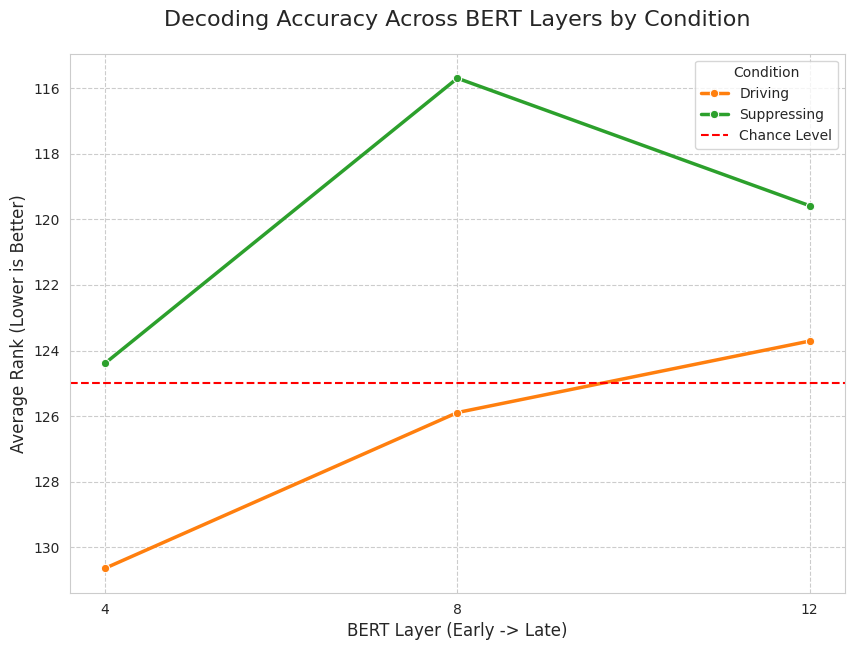

In [ ]:
# Analyze and Plot Layer-wise Results

# Converts results to a pandas DataFrame for easy plotting
df_results = pd.DataFrame(results)

print("\nLayer-wise Decoding Results Summary")
print(df_results)

# Creates the interaction plot
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")
sns.lineplot(data=df_results, x='layer', y='avg_rank', hue='condition', marker='o',
             palette={'Driving':'#ff7f0e', 'Suppressing':'#2ca02c'}, linewidth=2.5)

plt.title('Decoding Accuracy Across BERT Layers by Condition', fontsize=16, pad=20)
plt.xlabel('BERT Layer (Early -> Late)', fontsize=12)
plt.ylabel('Average Rank (Lower is Better)', fontsize=12)
plt.xticks(df_results['layer'].unique()) # Ensures we have ticks for each tested layer
plt.axhline(250 / 2, color='red', linestyle='--', label='Chance Level')
plt.legend(title='Condition')
plt.gca().invert_yaxis() # Inverts y-axis so that "better" (lower rank) is higher on the plot
plt.grid(True, which='both', linestyle='--')
plt.show()

In [ ]:
# Expansion A - FULL Layer-wise Decoding Analysis
# We will now test all 12 layers of BERT to get a high-resolution
# view of the processing hierarchy.

import time
import pandas as pd
import numpy as np
from transformers import BertModel
from learn_decoder import learn_decoder

# 1. Generates layer-wise BERT embeddings for ALL layers
# Ensures tokenizer is already loaded from a previous cell
model_with_layers = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)
model_with_layers.eval()

def get_all_bert_layer_embeddings(sentence):
    with torch.no_grad():
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128)
        outputs = model_with_layers(**inputs)
        hidden_states = outputs.hidden_states # Tuple of 13 tensors (input + 12 layers)

        # Return the [CLS] token's embedding from each of the 12 layers
        return [state[:, 0, :].squeeze().numpy() for state in hidden_states[1:]]

# Defines which layers to test (0-indexed)
# We will test all 12 layers (indices 0 through 11)
layers_to_test = list(range(12))
print(f"Will be generating embeddings for all {len(layers_to_test)} BERT layers.")

# Generates and stores embeddings ---
start_time = time.time()

# For TRAINING (Baseline) sentences
vectors_train_layers = {layer_idx: [] for layer_idx in layers_to_test}
for sentence in sentences_train_baseline:
    all_layer_vectors = get_all_bert_layer_embeddings(sentence)
    for layer_idx in layers_to_test:
        vectors_train_layers[layer_idx].append(all_layer_vectors[layer_idx])

# For TESTING (D/S) sentences
vectors_test_layers = {layer_idx: [] for layer_idx in layers_to_test}
for sentence in sentences_test_exp:
    all_layer_vectors = get_all_bert_layer_embeddings(sentence)
    for layer_idx in layers_to_test:
        vectors_test_layers[layer_idx].append(all_layer_vectors[layer_idx])

# Convert lists to NumPy arrays
for layer_idx in layers_to_test:
    vectors_train_layers[layer_idx] = np.array(vectors_train_layers[layer_idx])
    vectors_test_layers[layer_idx] = np.array(vectors_test_layers[layer_idx])

end_time = time.time()
print(f"Embedding generation took {(end_time - start_time) / 60:.2f} minutes.")

# 2. Run the Decoding Experiment for Each Layer
print("\nRunning Decoding Experiment Across All Layers")

# Stores results here
results_all_layers = []

for layer_idx in layers_to_test:
    layer_num = layer_idx + 1 # For printing (1-indexed)
    print(f"\nTESTING LAYER {layer_num}")

    # Trains a specific decoder for this layer's vectors
    decoder_M_layer = learn_decoder(fmri_train_baseline, vectors_train_layers[layer_idx])

    # Predicts vectors for the entire test set
    predicted_vectors_exp_layer = fmri_test_exp @ decoder_M_layer

    # Splits predicted and true vectors by condition
    predicted_driving_layer = predicted_vectors_exp_layer[driving_mask_exp]
    true_driving_layer = vectors_test_layers[layer_idx][driving_mask_exp]

    predicted_suppressing_layer = predicted_vectors_exp_layer[suppressing_mask_exp]
    true_suppressing_layer = vectors_test_layers[layer_idx][suppressing_mask_exp]

    # Evaluates driving condition for this layer
    ranks_driving_layer = calculate_rank_accuracy(predicted_driving_layer, true_driving_layer)
    avg_rank_driving_layer = np.mean(ranks_driving_layer)
    print(f"Avg Rank for Driving (Layer {layer_num}): {avg_rank_driving_layer:.2f}")
    results_all_layers.append({'condition': 'Driving', 'layer': layer_num, 'avg_rank': avg_rank_driving_layer})

    # --- Evaluate Suppressing condition for this layer ---
    ranks_suppressing_layer = calculate_rank_accuracy(predicted_suppressing_layer, true_suppressing_layer)
    avg_rank_suppressing_layer = np.mean(ranks_suppressing_layer)
    print(f"Avg Rank for Suppressing (Layer {layer_num}): {avg_rank_suppressing_layer:.2f}")
    results_all_layers.append({'condition': 'Suppressing', 'layer': layer_num, 'avg_rank': avg_rank_suppressing_layer})

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Will be generating embeddings for all 12 BERT layers.
Embedding generation took 4.72 minutes.

Running Decoding Experiment Across All Layers

TESTING LAYER 1
Avg Rank for Driving (Layer 1): 133.08
Avg Rank for Suppressing (Layer 1): 126.40

TESTING LAYER 2
Avg Rank for Driving (Layer 2): 136.87
Avg Rank for Suppressing (Layer 2): 119.01

TESTING LAYER 3
Avg Rank for Driving (Layer 3): 137.57
Avg Rank for Suppressing (Layer 3): 122.78

TESTING LAYER 4
Avg Rank for Driving (Layer 4): 130.64
Avg Rank for Suppressing (Layer 4): 124.39

TESTING LAYER 5
Avg Rank for Driving (Layer 5): 131.68
Avg Rank for Suppressing (Layer 5): 124.55

TESTING LAYER 6
Avg Rank for Driving (Layer 6): 129.37
Avg Rank for Suppressing (Layer 6): 124.20

TESTING LAYER 7
Avg Rank for Driving (Layer 7): 124.33
Avg Rank for Suppressing (Layer 7): 116.87

TESTING LAYER 8
Avg Rank for Driving (Layer 8): 125.89
Avg Rank for Suppressing (Layer 8): 115.70

TESTING LAYER 9
Avg Rank for Driving (Layer 9): 123.46
Avg Rank fo


Full Layer-wise Decoding Results Summary
condition  Driving  Suppressing
layer                          
1          133.084      126.404
2          136.872      119.012
3          137.568      122.784
4          130.640      124.388
5          131.680      124.552
6          129.368      124.204
7          124.328      116.868
8          125.892      115.696
9          123.456      115.548
10         121.740      115.484
11         122.908      116.996
12         123.712      119.584


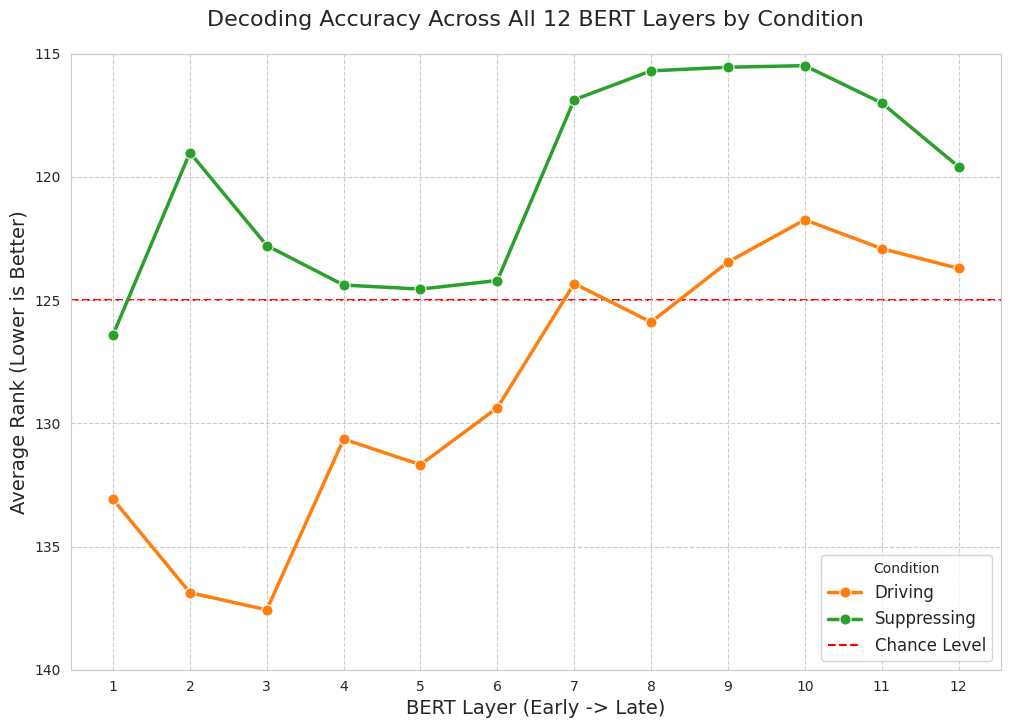

In [ ]:
# Analyze and Plot FULL Layer-wise Results (Wider Y-Axis)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Converts results to a pandas DataFrame for easy plotting
df_results_all_layers = pd.DataFrame(results_all_layers)

print("\nFull Layer-wise Decoding Results Summary")
print(df_results_all_layers.pivot(index='layer', columns='condition', values='avg_rank'))

# Creates the high-resolution interaction plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
plot = sns.lineplot(data=df_results_all_layers, x='layer', y='avg_rank', hue='condition', marker='o',
                    palette={'Driving':'#ff7f0e', 'Suppressing':'#2ca02c'}, linewidth=2.5, markersize=8)

plt.title('Decoding Accuracy Across All 12 BERT Layers by Condition', fontsize=16, pad=20)
plt.xlabel('BERT Layer (Early -> Late)', fontsize=14)
plt.ylabel('Average Rank (Lower is Better)', fontsize=14)
plt.xticks(np.arange(1, 13)) # Ensures we have a tick for every layer
plt.axhline(250 / 2, color='red', linestyle='--', label='Chance Level', zorder=0)
plt.legend(title='Condition', fontsize=12)
plt.gca().invert_yaxis() # Inverts y-axis so that "better" (lower rank) is higher on the plot
plt.ylim(140, 115)

plt.legend(title='Condition', fontsize=12)
plt.grid(True, which='both', linestyle='--')
plt.show()

In [ ]:
# Expansion B: Run the Core ENCODING Experiment
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np
from scipy.stats import pearsonr

# 1. Trains the ENCODING model on the BASELINE data
# X is now the BERT vectors, y is the fMRI data
X_train = vectors_train_baseline
y_train = fmri_train_baseline

encoding_model = LinearRegression()
encoding_model.fit(X_train, y_train)

# 2. Test the model on the experimental data
# X_test is now the BERT vectors for the experimental set
X_test = vectors_test_exp
# y_true is the real fMRI data for the experimental set
y_true = fmri_test_exp

# Predicts the fMRI data from the sentence vectors
y_pred = encoding_model.predict(X_test)

# 3. Evaluates the performance for each condition separately
driving_mask_exp = (conditions_test_exp == 'D')
suppressing_mask_exp = (conditions_test_exp == 'S')

# For each sentence, calculates the correlation between the predicted and true fMRI pattern (across the 6 ROIs)
correlations = []
for i in range(len(y_true)):
    # pearsonr returns (correlation_coefficient, p-value)
    corr, _ = pearsonr(y_true[i], y_pred[i])
    correlations.append(corr)

correlations = np.array(correlations)

# Splits the correlations by condition
driving_correlations = correlations[driving_mask_exp]
suppressing_correlations = correlations[suppressing_mask_exp]

# The metric is now the average correlation. Higher is better.
avg_corr_driving = np.mean(driving_correlations)
avg_corr_suppressing = np.mean(suppressing_correlations)

print(f"\nAverage Prediction Correlation for Driving: {avg_corr_driving:.3f}")
print(f"Average Prediction Correlation for Suppressing: {avg_corr_suppressing:.3f}")


Average Prediction Correlation for Driving: 0.004
Average Prediction Correlation for Suppressing: 0.035


Encoding Statistical Analysis (T-test)
T-statistic: -0.64
P-value: 0.5194

Conclusion: The difference in predictability is not statistically significant or did not match the hypothesis.


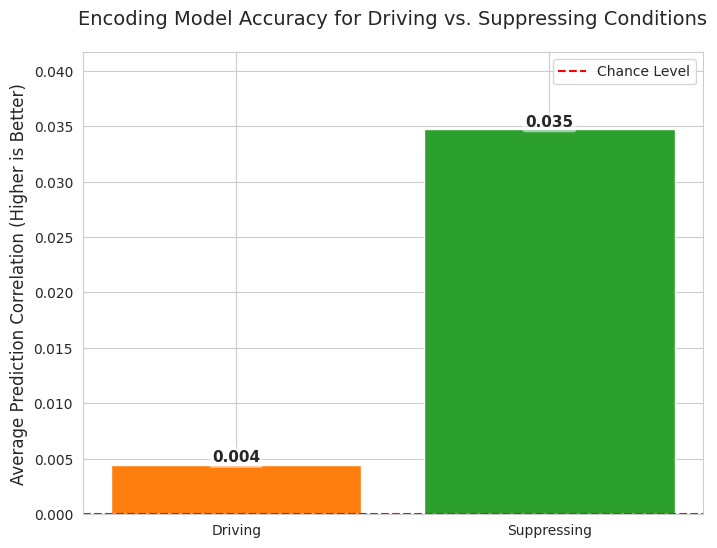

In [ ]:
# Expansion B: Analyze and Plot ENCODING Results
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Test
ttest_encoding = stats.ttest_ind(driving_correlations, suppressing_correlations, equal_var=False)
print("Encoding Statistical Analysis (T-test)")
print(f"T-statistic: {ttest_encoding.statistic:.2f}")
print(f"P-value: {ttest_encoding.pvalue:.4f}")

if ttest_encoding.pvalue < 0.05 and avg_corr_suppressing > avg_corr_driving:
    print("\nConclusion: As hypothesized, the 'Suppressing' condition is significantly more predictable (encodable) than the 'Driving' condition.")
else:
    print("\nConclusion: The difference in predictability is not statistically significant or did not match the hypothesis.")

# Final Bar Plot
conditions_plot = ['Driving', 'Suppressing']
avg_corrs_plot = [avg_corr_driving, avg_corr_suppressing]
chance_level_plot = 0.0 # Chance for correlation is 0

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
bars = plt.bar(conditions_plot, avg_corrs_plot, color=['#ff7f0e', '#2ca02c'])
plt.axhline(y=chance_level_plot, color='red', linestyle='--', label='Chance Level')

plt.ylabel('Average Prediction Correlation (Higher is Better)', fontsize=12)
plt.title('Encoding Model Accuracy for Driving vs. Suppressing Conditions', fontsize=14, pad=20)
plt.legend()

# Adds the correlation values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center',
             fontsize=11, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.2'))

# Adjusts y-axis for better visibility if values are small
max_corr = max(avg_corrs_plot)
plt.ylim(min(0, min(avg_corrs_plot)*1.2), max(0.01, max_corr * 1.2))
plt.show()